In [1]:
import tweepy
import pandas as pd
import re
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import seaborn as sns
import pickle
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
plt.style.use('fivethirtyeight') 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mubin_sikilkar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("Dataset.csv")
df.head()

,Unnamed: 0,Author_ID,Date_of_tweet,Tweet,Likes_on_tweet,User_handle,Tweet_link
0,0,6.048318e+07,2020-08-04 23:31:59+00:00,Historically #TamilNadu has been a state with ...,1,venkattcv,https://twitter.com/venkattcv/status/129079263...
1,1,1.180000e+18,2020-08-04 23:31:56+00:00,#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...,0,BethEYoung3,https://twitter.com/BethEYoung3/status/1290792...
2,2,1.070000e+18,2020-08-04 22:22:30+00:00,@cbseindia29 @PMOIndia @narendramodi @DrRPNish...,1,PatelPrerak18,https://twitter.com/PatelPrerak18/status/12907...
3,3,5.835189e+08,2020-08-04 22:20:56+00:00,@PMOIndia’s anti-democratic #NEP2020 was 400+ ...,1,kchongpacrim,https://twitter.com/kchongpacrim/status/129077...
4,4,3.633987e+07,2020-08-04 21:01:14+00:00,The latest The Nursing Education Daily! http:/...,0,SkyscapeInc,https://twitter.com/SkyscapeInc/status/1290754...


In [3]:
#Removing unwanted columns : Author_ID, User_handle, Tweet_link
df = df.drop(columns=['Unnamed: 0','Author_ID', 'Date_of_tweet', 'User_handle','Tweet_link'])
df.head()

,Tweet,Likes_on_tweet
0,Historically #TamilNadu has been a state with ...,1
1,#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...,0
2,@cbseindia29 @PMOIndia @narendramodi @DrRPNish...,1
3,@PMOIndia’s anti-democratic #NEP2020 was 400+ ...,1
4,The latest The Nursing Education Daily! http:/...,0


In [4]:
#Lowercasing the Tweets
df['Tweet'] = df['Tweet'].str.lower()

In [5]:
# Removing http links, special characters(@, #, ', +, -, !, comma etc.)
df['Clean_tweet'] = df['Tweet'].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", regex=True)

In [6]:
customStopwords = ['i', 'me', 'my', 'we', 'our', 'you','has','ha', 'he', 'him', 'his', 'she', 'her', 'it','the', 'was','what', 'which', 'who', 'whom', 'am', 'is','in', 'are', 'was', 'were', 'be', 'a', 'an','and','of', 'at', 'by', 'for','to','on', 'off','here', 'there', 'when', 'where','all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such','so', 'than','s', 't', 'can','now', 'd', 'l', 'm', 'o', 're', 've', 'y']


In [7]:
#Tokenization 
tokenizedTweet = df['Clean_tweet'].apply(lambda x: x.split())

In [8]:

# Sentence Without Stopwords
sentenceWithoutStopword = tokenizedTweet.apply(lambda sentence: [word for word in sentence if not word in customStopwords])


In [9]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
tokenizedTweet = tokenizedTweet.apply(lambda sentence:[lemmatizer.lemmatize(w) for w in sentence])


In [10]:
#Removing Stopwords
sentenceWithoutStopword = tokenizedTweet.apply(lambda sentence: [word for word in sentence if not word in customStopwords])


In [11]:
#Combining all words into single sentence
for i in range(len(sentenceWithoutStopword)):
    sentenceWithoutStopword[i] = " ".join(sentenceWithoutStopword[i])


In [12]:
df['Clean_Tweet'] = sentenceWithoutStopword

In [13]:
#Create function to get subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create 2 new colums
df['Subjectivity'] = df['Clean_tweet'].apply(getSubjectivity)
df['Polarity'] = df['Clean_tweet'].apply(getPolarity)

In [14]:

#Create function for -ve,neutral and +ve analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

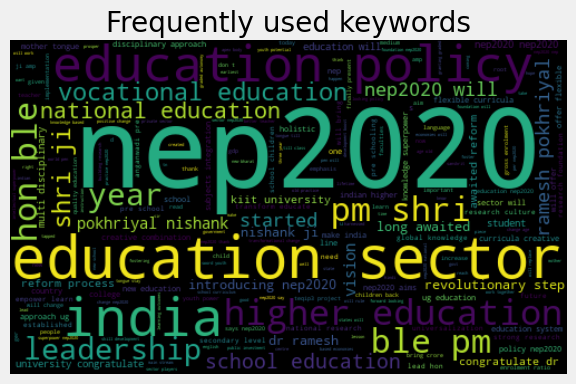

In [15]:
#Visualize frequent words
allWords = " ".join([sentence for sentence in df['Clean_tweet']])

wordCloud = WordCloud(width = 500, height = 300, random_state = 30, max_font_size = 100).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.title("Frequently used keywords")
plt.show()

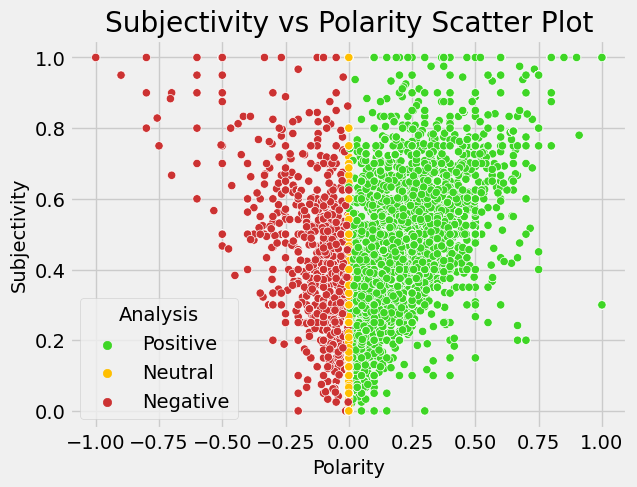

In [16]:
plt.figure()
colors=["#3ED625","#FFBF00","#cc3232"]# replace with your desired colors
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(x="Polarity",y="Subjectivity",hue="Analysis",data=df)
plt.title("Subjectivity vs Polarity Scatter Plot")
plt.show()

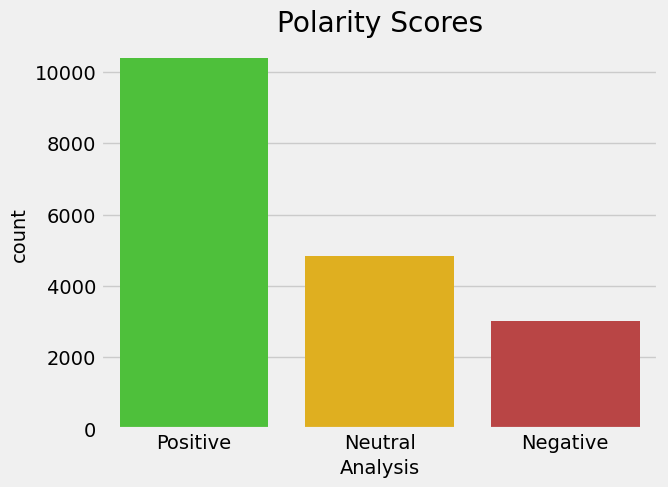

In [17]:
# Visualising the Label count
sns.countplot(x=df["Analysis"])
plt.title("Polarity Scores")
plt.show()

In [18]:
#Total people count : calculated from likes column
totalLikes = df.shape[0]
#df['Retweet-Count'].sum(axis = 0, skipna = True)

#percentage of +ve tweets 
posTweets = df[df.Analysis == 'Positive']
#likesCountPos = posTweets['Retweet-Count'].sum(axis = 0, skipna = True)
likesCountPos = posTweets.count()
poCount = round((likesCountPos / totalLikes) *100 , 1)

#percentage of -ve tweets 
negTweets = df[df.Analysis == 'Negative']
likesCountNeg = negTweets.count()
negCount = round((likesCountNeg / totalLikes) *100 , 1)

#percentage of neutral tweets 
neutralCount = 100 - (poCount + negCount)

print("positve = ",poCount,"% , Negative = ",negCount,"% , Neutral = ",neutralCount)

positve =  Tweet             56.9
Likes_on_tweet    56.9
Clean_tweet       56.9
Clean_Tweet       56.9
Subjectivity      56.9
Polarity          56.9
Analysis          56.9
dtype: float64 % , Negative =  Tweet             16.5
Likes_on_tweet    16.5
Clean_tweet       16.5
Clean_Tweet       16.5
Subjectivity      16.5
Polarity          16.5
Analysis          16.5
dtype: float64 % , Neutral =  Tweet             26.6
Likes_on_tweet    26.6
Clean_tweet       26.6
Clean_Tweet       26.6
Subjectivity      26.6
Polarity          26.6
Analysis          26.6
dtype: float64


Text(0.5, 1.0, 'Percentage wise sentiment representation')

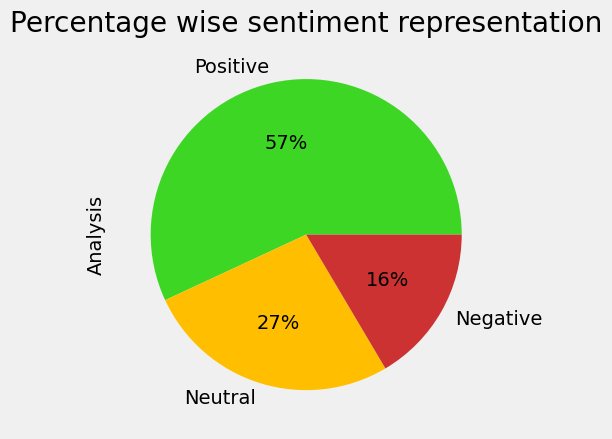

In [19]:
# Plots pie chart
df['Analysis'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title("Percentage wise sentiment representation")

In [20]:
#Show value count
df['Analysis'].value_counts()

Positive    10383
Neutral      4849
Negative     3008
Name: Analysis, dtype: int64

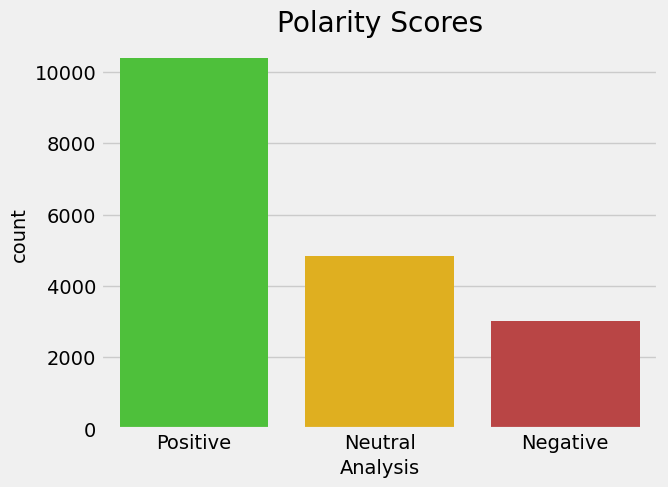

In [21]:
# Visualising the Label count
sns.countplot(x=df["Analysis"])
plt.title("Polarity Scores")
plt.show()

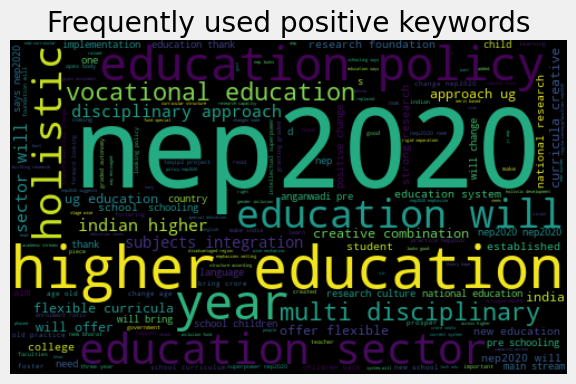

In [22]:
#Visualize frequent +ve words
allWords = " ".join([sentence for sentence in df['Clean_tweet'][df['Analysis']=='Positive']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 30, max_font_size = 100).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.title("Frequently used positive keywords")
plt.axis('off')
plt.show()

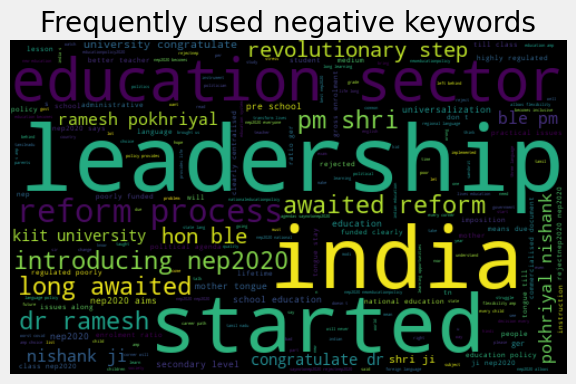

In [23]:
#Visualize frequent -ve words
allWords = " ".join([sentence for sentence in df['Clean_tweet'][df['Analysis']=='Negative']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 30, max_font_size = 100).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.title("Frequently used negative keywords")
plt.axis('off')
plt.show()

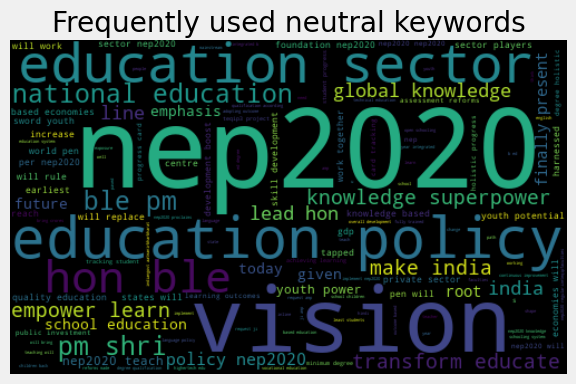

In [24]:
#Visualize frequent neutral words
allWords = " ".join([sentence for sentence in df['Clean_tweet'][df['Analysis']=='Neutral']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 30, max_font_size = 100).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.title("Frequently used neutral keywords")
plt.axis('off')
plt.show()

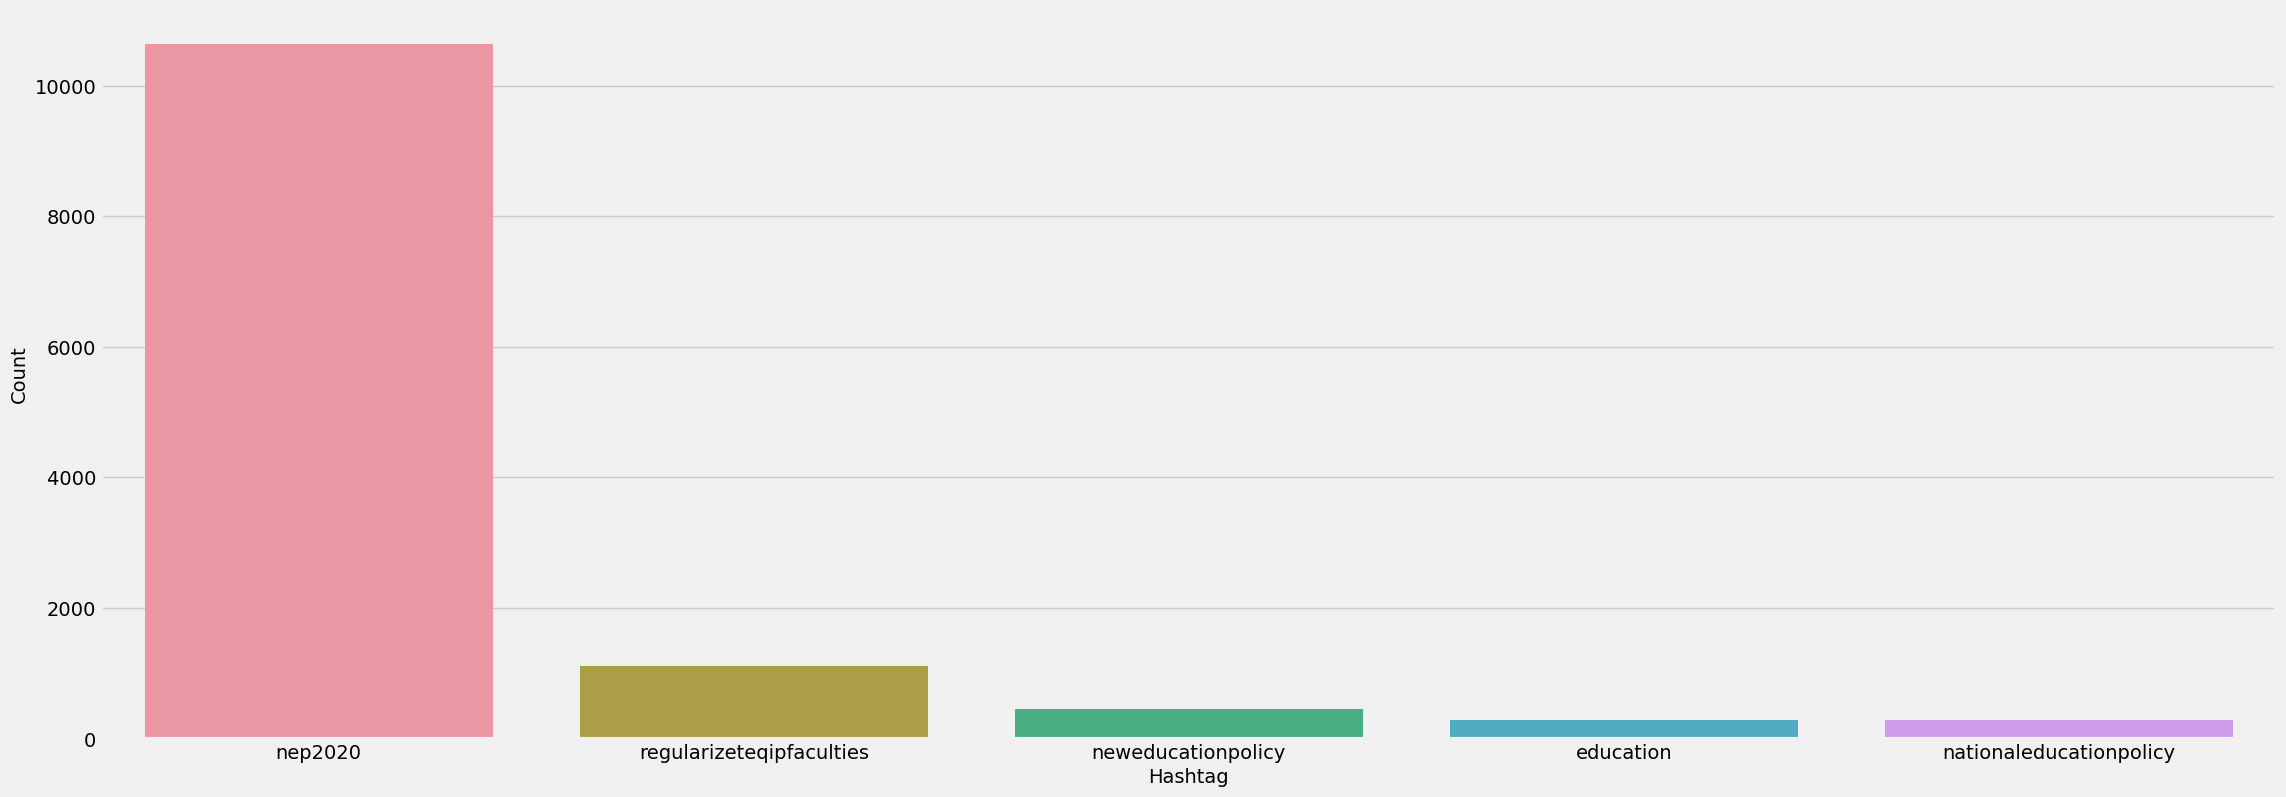

In [25]:
#Extracting hashtags
def hastag_extract(tweets):
    hashtags=[]
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

#Extract hashtags from +ve tweets
htPos=hastag_extract(df['Tweet'][df['Analysis']=='Positive'])
#Extract hashtags from -ve tweets
htNeg=hastag_extract(df['Tweet'][df['Analysis']=='Negative'])
#unnest list
htPos=sum(htPos,[])
htNeg=sum(htNeg,[])
freqPos=nltk.FreqDist(htPos)
dPos=pd.DataFrame({'Hashtag':list(freqPos.keys()),'Count':list(freqPos.values())})
#Selecting top 10 hashtags
dPos=dPos.nlargest(columns='Count',n=5)
plt.figure(figsize=(25,9))
sns.barplot(data=dPos,x='Hashtag',y='Count')
plt.show()
freqNeg=nltk.FreqDist(htNeg)
dNeg=pd.DataFrame({'Hashtag':list(freqNeg.keys()),'Count':list(freqNeg.values())})

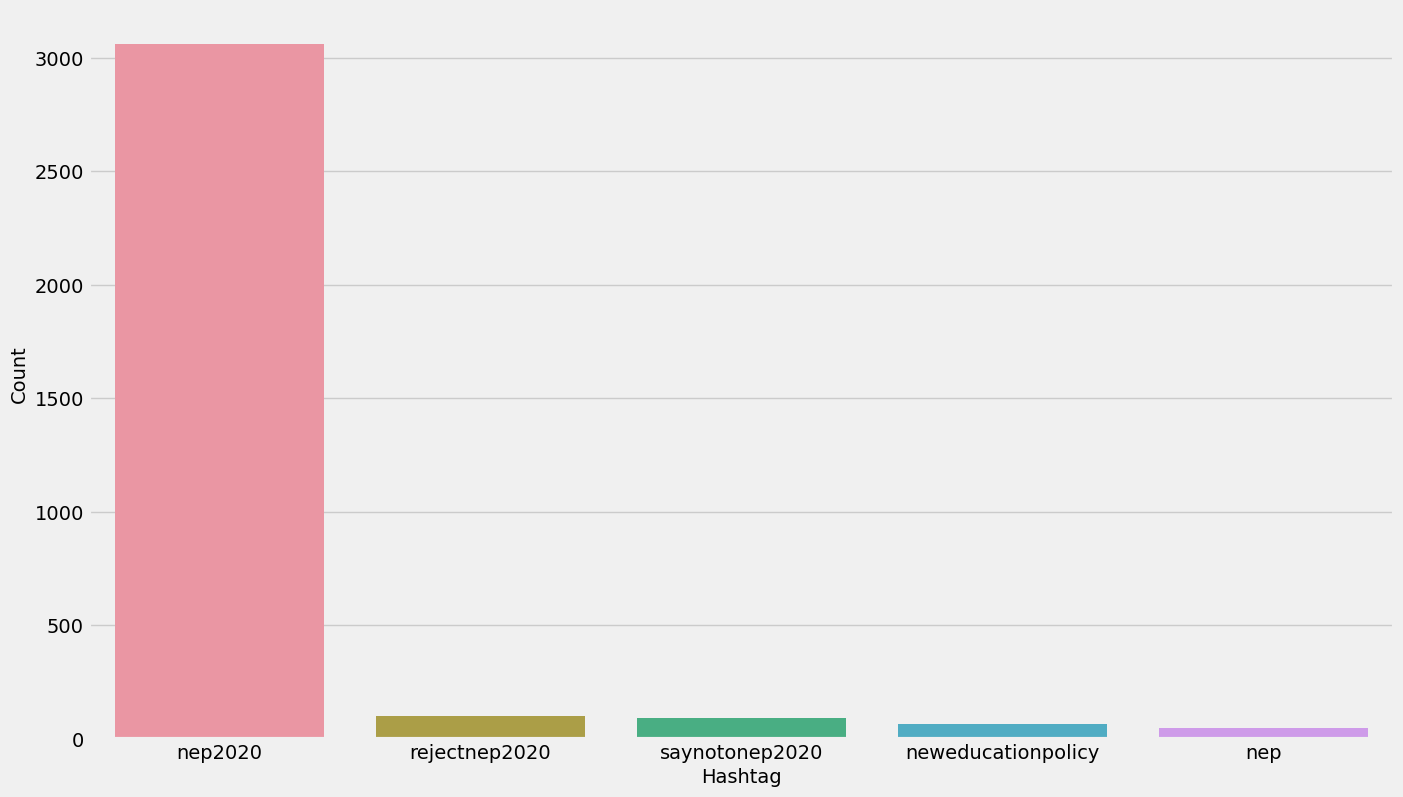

In [26]:
#Selecting top 10 hashtags
dNeg = dNeg.nlargest(columns='Count', n=5)
plt.figure(figsize = (15,9))
sns.barplot(data = dNeg,x='Hashtag',y='Count')
plt.show()

In [27]:
#Creating new dataframe which only has +ve and -ve values
dfAnalysis = df[df.Analysis != 'Neutral']

bowVectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)
bow = bowVectorizer.fit_transform(dfAnalysis['Clean_tweet'])

In [31]:
#Creating a new label column : -ve as 1 , +ve as 0 
def getLabel(score):
    if score<0:
            return 1
    else:
        return 0

dfAnalysis.loc[:, 'Label'] = dfAnalysis['Polarity'].apply(getLabel)


xTrain, xTest, yTrain, yTest = train_test_split(bow, dfAnalysis['Label'], random_state=42,test_size=0.25)

#Training
model = LogisticRegression(max_iter=10000)
model.fit(xTrain, yTrain)

#Testing
yPred = model.predict(xTest)
f1_score(yTest, yPred)

accuracy_score(yTest,yPred)

C:\Users\mubin_sikilkar\AppData\Local\Temp\ipykernel_11940\402415292.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAnalysis.loc[:, 'Label'] = dfAnalysis['Polarity'].apply(getLabel)


0.9405615292712067

In [32]:
# open a file, where you want to store the data

filename = 'sentimentfile'
outfile = open(filename, 'wb')

# dump information to that file
pickle.dump(model, outfile)
outfile.close()

modelReceieved = open(filename,'rb')
newFile = pickle.load(modelReceieved)

print(newFile)

print(type(newFile))

LogisticRegression(max_iter=10000)
<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [33]:

y_prediction = newFile.predict(xTest)
f1_score(yTest, y_prediction)
print("Logistic Regression accuracy: "+str(accuracy_score(yTest,y_prediction)))

Logistic Regression accuracy: 0.9405615292712067


In [34]:

#Training
model = BernoulliNB()
model.fit(xTrain, yTrain)

#Testing
yPred = model.predict(xTest)
f1_score(yTest, yPred)

print("Bernoulli Naive Bayes accuracy: "+ str(accuracy_score(yTest,yPred)))

Bernoulli Naive Bayes accuracy: 0.9014336917562724


In [35]:
#Training
model = LinearSVC(max_iter=10000)
model.fit(xTrain, yTrain)

#Testing
yPred = model.predict(xTest)
f1_score(yTest, yPred)

print("SVM accuracy: "+str(accuracy_score(yTest,yPred)))

SVM accuracy: 0.9468339307048984


In [37]:
#Training
model = RandomForestClassifier(n_estimators = 100)
model.fit(xTrain, yTrain)

#Testing
yPred = model.predict(xTest)
f1_score(yTest, yPred)

print("Random Forest accuracy: "+str(accuracy_score(yTest,yPred)))

# sns.displot(yTest - yPred)
# plt.show()

Random Forest accuracy: 0.953405017921147


In [38]:
df.to_csv('Final_Dataset.csv')